### 使用[0， 1]上的均匀分布来生成任意连续分布

#### 算法原理

定理：若随机变量X的分布函数$F_{X}(x)$为严格单调增的连续函数，其反函数$F_{X}^{-1}(y)$存在，则$Y = F_{X}(x)$服从$(0, 1)$上的均匀分布$U(0, 1)$.(证明略)

这个定理表明：均匀分布在连续分布类中占有特殊地位。任一个连续随机变量$X$都可以通过其分布函数$F_{X}(x)$于均匀分布随机变量$U$发生关系。譬如$X$服从指数分布$Exp(\lambda)$, 其分布函数为$F_{x} = 1 - e^{-\lambda x}$,当$x$换为$X$后，有
$$U = 1 - e^{-\lambda X}$$ 或$$X = \frac{1}{\lambda}ln\frac{1}{1-U}$$ 而后一式表明：由均匀分布$U(0, 1)$的随机数（伪观察值）$u_{i}$可得指数分布$Exp(\lambda)$的随机数$x_{i} = \frac{1}{\lambda}ln\frac{1}{1-u_{i}}, i = 1, 2, 3...$.


#### Python实现

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import erfinv

In [2]:
# 定义基类
class MyRandom:
    def __init__(self, n=500):
        self._n = n
        self._uniform_points = np.random.uniform(0, 1, n)
        self._comput_points = None
        self._mydist_points = None

    def get_comput_points(self):
        pass

    def get_mydist_point(self):
        pass

    def plot(self):
        pass

##### 指数分布验证

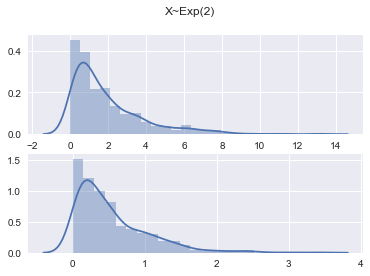

In [3]:
# Exponential
class MyExp(MyRandom):
    def __init__(self, lamb=1, n=500):
        super().__init__(n)
        self._lamb = lamb

    def get_comput_points(self):
        self._comput_points = np.random.exponential(self._lamb, self._n)

    def get_mydist_point(self):
        self._mydist_points = (1/self._lamb)*np.log(1/(1-self._uniform_points))

    def plot(self):
        self.get_comput_points()
        self.get_mydist_point()

        plt.subplot(211)
        sns.distplot(self._comput_points)
        plt.subplot(212)
        sns.distplot(self._mydist_points)
        plt.suptitle('X~Exp(%s)' % self._lamb)
        plt.show()

myexp = MyExp(2, 500)
myexp.plot()


上面的子图是计算机生成的指数分布，下面的是通过上面的算法生成的，可以看到基本是一致的。

##### 正态分布验证

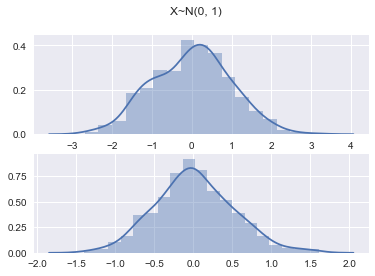

In [6]:
# Normal
class MyNormal(MyRandom):
    def __init__(self, mu=0, sigma=1, n=500):
        super().__init__(n)
        self._mu = mu
        self._sigma = sigma

    def get_comput_points(self):
        self._comput_points = np.random.normal(self._mu, self._sigma, self._n)

    def get_mydist_point(self):
        self._mydist_points = erfinv(2*self._uniform_points-1)*(self._sigma/np.sqrt(2))+self._mu

    def plot(self):
        self.get_comput_points()
        self.get_mydist_point()

        plt.subplot(211)
        sns.distplot(self._comput_points)
        plt.subplot(212)
        sns.distplot(self._mydist_points)
        plt.suptitle('X~N(%s, %s)' % (self._mu, self._sigma))
        plt.show()

mynorm = MyNormal(0, 1, 500)
mynorm.plot()

同样，上面的子图是计算机生成的正态分布，下面的是通过上面的算法生成的，也基本是一致的。